# Ch04. Numpy기본: 배열과 벡터연산

In [1]:
#배열처리 속도비교
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

%time for _ in range(10):my_arr2 = my_arr *2

%time for _ in range(10):my_list2 = [x*2 for x in my_list ]

Wall time: 48.3 ms
Wall time: 2.01 s


In [2]:
[1,2,3] *2

[1, 2, 3, 1, 2, 3]

## 4.1 Numpy ndarray : 다차원 배열객체

In [3]:
import numpy as np
data = np.random.randn(2,3)
data

array([[-1.82366269,  1.32842195, -0.04508146],
       [ 0.92150133, -0.07987557, -1.10277628]])

In [4]:
data * 10

array([[-18.23662685,  13.28421948,  -0.45081465],
       [  9.21501327,  -0.79875569, -11.02776279]])

In [5]:
data + data

array([[-3.64732537,  2.6568439 , -0.09016293],
       [ 1.84300265, -0.15975114, -2.20555256]])

ndarray에 저장된 데이터는 모두 같은 타입이어야햠

In [6]:
data.shape
data.dtype

(2, 3)

dtype('float64')

### 4.1.1 ndarray 생성하기

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

data2 = [[1,2,3,4],
        [5,6,7,8]]
arr2 = np.array(data2)
arr2

array([6. , 7.5, 8. , 0. , 1. ])

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [8]:
arr2.ndim
arr2.shape

#명시적으로 알려주지 않으면 적절한 데이터 타입을 추론함
arr1.dtype
arr2.dtype

2

(2, 4)

dtype('float64')

dtype('int32')

**새 배열 생성**

In [9]:
np.zeros((10,10),dtype = np.int32)
np.ones((2,3))
np.empty(10) #초기화 안된 걍 가비지값
np.arange(10)
np.full((2,3),1)
np.eye(5)
#자료형을 명시하지 않으면 float64로 대부분 나옴

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([[1., 1., 1.],
       [1., 1., 1.]])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[1, 1, 1],
       [1, 1, 1]])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [10]:
#astype 이용해서 dtype 캐스팅 가능
#!! astype은 타입이 이전과 동일해도 항상 새 배열을 생성한다.
a = np.empty((5,5),dtype = np.int32)
b = a.astype(dtype=np.float64)
a.dtype
b.dtype

dtype('int32')

dtype('float64')

**np.string 은 고정된 크기를 가지기 때문에 임의로 데이터를 자를수 있으므로 주의해야함**

In [11]:
#다른 배열의 타입 가져올수도 있음
a = np.array([1,2,3],dtype=np.int32)
b = np.zeros((2,3),dtype=np.float64)
c = b.astype(a.dtype)
a
b
c

array([1, 2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[0, 0, 0],
       [0, 0, 0]])

In [12]:
#축약코드를 사용할수도 있음
empty_uint32 = np.empty(8,dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### 4.1.3 Numpy배열의 산술연산  
- for 문을 안쓰고도 데이터를 일괄처리할수 있음 (벡터화)  


### 4.1.4 색인과 슬라이싱 기초  
- 리스트와 비슷하지만 차이점은 슬라이싱 한 결과가 원본의 뷰라는 점임

In [13]:
arr = np.arange(10)
arr_slice = arr[5:]
arr_slice
arr_slice[0] = 20
arr_slice
arr


a = list(range(10))
a_slice = a[5:]
a_slice[0] = 20
a_slice
a

array([5, 6, 7, 8, 9])

array([20,  6,  7,  8,  9])

array([ 0,  1,  2,  3,  4, 20,  6,  7,  8,  9])

[20, 6, 7, 8, 9]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
arr = np.arange(10)
arr_slice = arr[5:]
arr_slice[:]=20
arr

array([ 0,  1,  2,  3,  4, 20, 20, 20, 20, 20])

- 위처럼 데이터 복사가 안일어나기때문에 고용량 데이터에서 유리한 면이있음  
- 복사를 하고싶다면 .copy()를 해서 명시적으로 복사해야함

- 다차원 배열에서 마지막 색인을 생략시 한차원 낮은 ndarray가됨

In [15]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

arr3d[0]

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
old_values = arr3d[0].copy()

arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [17]:
arr3d[0] = old_values
arr3d
"""
조각난 arr에도 스칼라, 배열 모두 대입가능
"""

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

'\n조각난 arr에도 스칼라, 배열 모두 대입가능\n'

### 4.1.5 불리언 값으로 선택하기

In [18]:
names=  np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)
names
data

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

array([[-0.61154217,  0.01866177,  0.77337931,  1.25630407],
       [ 0.65294263, -0.88725449,  1.06498598,  0.09555667],
       [ 0.54402658, -0.71656225, -1.25114174, -0.07477464],
       [ 0.44905361,  1.05221744,  1.26478143, -0.1516545 ],
       [-0.16573046, -0.0229659 , -0.66982767,  0.86359057],
       [ 0.83164014,  0.4973722 , -0.13472428, -0.82132421],
       [ 1.38433952,  0.54522251, -0.14912584,  0.16731575]])

In [19]:
a = (names == 'Bob')
a

array([ True, False, False,  True, False, False, False])

In [20]:
data[names=='Bob']

array([[-0.61154217,  0.01866177,  0.77337931,  1.25630407],
       [ 0.44905361,  1.05221744,  1.26478143, -0.1516545 ]])

In [21]:
data[names=='Bob',2:]

array([[ 0.77337931,  1.25630407],
       [ 1.26478143, -0.1516545 ]])

In [22]:
data[names=='Bob',3]

array([ 1.25630407, -0.1516545 ])

In [23]:
#Bob이 아닌놈
names!='Bob'

data[names!='Bob']
data[~(names=='Bob')]

array([False,  True,  True, False,  True,  True,  True])

array([[ 0.65294263, -0.88725449,  1.06498598,  0.09555667],
       [ 0.54402658, -0.71656225, -1.25114174, -0.07477464],
       [-0.16573046, -0.0229659 , -0.66982767,  0.86359057],
       [ 0.83164014,  0.4973722 , -0.13472428, -0.82132421],
       [ 1.38433952,  0.54522251, -0.14912584,  0.16731575]])

array([[ 0.65294263, -0.88725449,  1.06498598,  0.09555667],
       [ 0.54402658, -0.71656225, -1.25114174, -0.07477464],
       [-0.16573046, -0.0229659 , -0.66982767,  0.86359057],
       [ 0.83164014,  0.4973722 , -0.13472428, -0.82132421],
       [ 1.38433952,  0.54522251, -0.14912584,  0.16731575]])

In [24]:
#두가지 이름 선택 or, and
mask = (names == 'Bob')|(names=='Will')
data[mask]

array([[-0.61154217,  0.01866177,  0.77337931,  1.25630407],
       [ 0.54402658, -0.71656225, -1.25114174, -0.07477464],
       [ 0.44905361,  1.05221744,  1.26478143, -0.1516545 ],
       [-0.16573046, -0.0229659 , -0.66982767,  0.86359057]])

**불리언 배열을 이용해서 선택하면 데이터 복사가 일어남??**

### 4.1.6 팬시 색인  
- 정수 배열을 이용한 색인

In [25]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [26]:
#특정한 로우 선택하려면 걍 원하는 숫자가 담긴 ndarray나 list 넘기면됨
arr[[3,4,5]]
arr[[-1,-2,-1]]

array([[3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.]])

array([[7., 7., 7., 7.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [27]:
#다차원 배열을 넘기면 각각의 색인 튜플에 대응하는 1차원 배열이 선택됨
arr[[1,2,3],[1,2,3]]

array([1., 2., 3.])

In [28]:
#만약 2차원으로 선택하려면..
arr[[1,2,3]][:,[1,2,3]]

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

### 4.1.7 배열 전치와 축 바꾸기  
- 데이터를 복사하지 않고 모양이 바뀐 뷰를 제공

In [29]:
arr = np.arange(15).reshape((3,5))
arr
arr.shape

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

(3, 5)

In [30]:
arr.T
arr.T.shape

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

(5, 3)

## 4.2 유니버셜 함수 : 배열의 각 원소를 빠르게 처리하는 함수  
 - 하나이상의 스칼라값을 받아서 하나이상의 스칼라 결과값을 반환  
 - 고속으로 처리가능

In [31]:
arr = np.arange(10)
arr

np.sqrt(arr)
np.exp(arr) #단항 유니버셜함수

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [32]:
#이항 유니버셜 함수
x = np.random.randn(8)
y = np.random.randn(8)
x
y

np.maximum(x,y)

array([-0.79523513,  0.5934584 , -0.80792649,  0.1927989 ,  0.63381618,
        0.21212115, -0.77123103, -0.89786071])

array([ 0.420802  , -0.22410124,  0.48744054, -1.10455611,  0.50620253,
        2.4134318 ,  0.04443562, -0.7488975 ])

array([ 0.420802  ,  0.5934584 ,  0.48744054,  0.1927989 ,  0.63381618,
        2.4134318 ,  0.04443562, -0.7488975 ])

In [33]:
#여러개의 배열을 반환하는 유니버셜
arr = np.random.randn(7) *5
arr
remainde,whole_part = np.modf(arr)
remainde
whole_part


array([  3.39543142, -14.02840434,  -3.3702322 ,   5.16685961,
        -8.71358485,  -3.24207513,  -1.38789401])

array([ 0.39543142, -0.02840434, -0.3702322 ,  0.16685961, -0.71358485,
       -0.24207513, -0.38789401])

array([  3., -14.,  -3.,   5.,  -8.,  -3.,  -1.])

In [34]:
#out인자를 따로 추가해 값을 받을수도있음
arr
np.sqrt(arr)
np.sqrt(arr,arr)
arr

array([  3.39543142, -14.02840434,  -3.3702322 ,   5.16685961,
        -8.71358485,  -3.24207513,  -1.38789401])

C:\Users\sorkt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.84266964,        nan,        nan, 2.27307272,        nan,
              nan,        nan])

C:\Users\sorkt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


array([1.84266964,        nan,        nan, 2.27307272,        nan,
              nan,        nan])

array([1.84266964,        nan,        nan, 2.27307272,        nan,
              nan,        nan])

## 4.3 배열을 이용한 배열지향 프로그래밍  
- 배열연산을 이용하여 반복문의 제거하면 (벡터화) 성능이 매우 상승함

In [35]:
#meshgrid 는 두개의 1차원 배열을 받아서 가능한 모든수 짝을 만들어줌, 2차원 배열 2개 반환
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points,points)
xs
ys

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [36]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, '$\\sqrt{x^2 + y^2}$')

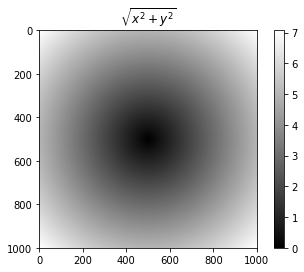

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title('$\sqrt{x^2 + y^2}$')

### 4.3.1 배열 연산으로 조건절 표현하기  
- np.where : x if 조건 else y 같은 삼항식의 베터화된 버전임

In [38]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [39]:
#cond가 True이면 x, 아니면 y를 취하고자 할때
result = [(x if c else y) for x,c,y in zip(xarr,cond,yarr)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

순수파이썬 문법이므로 큰배열일수록 성능 저하, 다차원 배열에는 사용불가

In [40]:
#np.where
result = np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [41]:
#꼭 배열일 필요없음
np.where(cond,xarr,5)
np.where(cond,1,5)

array([1.1, 5. , 1.3, 1.4, 5. ])

array([1, 5, 1, 1, 5])

In [42]:
#일반적인 예시, 음수는 모두 -2로, 양수는 모두 2로
arr = np.random.randn(4,4)
arr
arr>=0
np.where(arr>=0,2,-2)
np.where(arr>=0,2,arr)#스칼라, 배열 조합해서 양수만 바꿀수도 있음

array([[-0.72860281, -0.7794716 , -0.01387589, -0.69195367],
       [-1.10537005,  1.43891127,  0.30913503,  1.22014945],
       [ 1.34809279, -1.20167542, -0.29624198,  0.14710289],
       [-1.23282729,  0.27501954,  0.46928297, -0.03142455]])

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True, False, False,  True],
       [False,  True,  True, False]])

array([[-2, -2, -2, -2],
       [-2,  2,  2,  2],
       [ 2, -2, -2,  2],
       [-2,  2,  2, -2]])

array([[-0.72860281, -0.7794716 , -0.01387589, -0.69195367],
       [-1.10537005,  2.        ,  2.        ,  2.        ],
       [ 2.        , -1.20167542, -0.29624198,  2.        ],
       [-1.23282729,  2.        ,  2.        , -0.03142455]])

### 4.3.2 수학 메서드와 통계 메서드

In [43]:
arr = np.random.randn(5,4)
arr
arr.mean()
np.mean(arr)
np.sum(arr)

array([[ 1.5820164 ,  1.14529917, -0.6486242 ,  1.37705854],
       [ 0.40850807, -0.02393262, -0.2147173 ,  0.18623347],
       [ 0.3258652 , -0.42656392,  0.99039749,  0.1167077 ],
       [-0.09811045, -1.27739706, -0.90795464, -0.48019157],
       [ 0.74064673,  0.76574347, -0.38136559,  0.36762723]])

0.17736230627342423

0.17736230627342423

3.5472461254684844

In [44]:
#axis 받아서 해당 축에 해당하는 값만 계산가능
np.mean(arr,axis=0)
arr.sum(axis=1)
arr.sum(1)

array([ 0.59178519,  0.03662981, -0.23245285,  0.31348707])

array([ 3.45574991,  0.35609161,  1.00640648, -2.76365372,  1.49265184])

array([ 3.45574991,  0.35609161,  1.00640648, -2.76365372,  1.49265184])

In [45]:
#cumsum
arr.cumsum(0)
arr.cumprod(0)

array([[ 1.5820164 ,  1.14529917, -0.6486242 ,  1.37705854],
       [ 1.99052447,  1.12136655, -0.8633415 ,  1.56329201],
       [ 2.31638967,  0.69480263,  0.12705599,  1.67999971],
       [ 2.21827922, -0.58259442, -0.78089865,  1.19980813],
       [ 2.95892595,  0.18314905, -1.16226424,  1.56743536]])

array([[ 1.5820164 ,  1.14529917, -0.6486242 ,  1.37705854],
       [ 0.64626646, -0.02741002,  0.13927084,  0.25645439],
       [ 0.21059575,  0.01169212,  0.13793349,  0.0299302 ],
       [-0.02066164, -0.01493548, -0.12523735, -0.01437223],
       [-0.01530298, -0.01143675,  0.04776122, -0.00528362]])

In [46]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr
arr.cumsum(axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

### 4.3.3 불리언 배열을 위한 메서드

In [47]:
arr = np.random.randn(100)
(arr>0)
(arr>0).sum() #요러면 True인 원소수를 알수있음

array([False,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

56

In [48]:
#all과 any
bools = np.array([False,False,True,False])
bools.any()
bools.all()

True

False

### 4.3.4 정렬

In [49]:
arr = np.random.randn(6)
arr
arr.sort()
arr

array([-0.95246727, -0.13068818, -0.27467657,  0.58981376,  1.23441592,
       -0.43507542])

array([-0.95246727, -0.43507542, -0.27467657, -0.13068818,  0.58981376,
        1.23441592])

In [50]:
#다차원의 경우 넘긴 축의 값에 따라 정렬함
arr = np.random.randn(5,3)
arr
arr.sort(axis=0)
arr

array([[-0.35412615, -1.69669933,  2.81183484],
       [-1.00654434, -1.71578993,  0.4264395 ],
       [-0.14904082,  0.02934405, -1.47483221],
       [ 2.07434535, -0.57257444, -0.90112791],
       [-1.09438377, -0.01736547, -1.65145617]])

array([[-1.09438377, -1.71578993, -1.65145617],
       [-1.00654434, -1.69669933, -1.47483221],
       [-0.35412615, -0.57257444, -0.90112791],
       [-0.14904082, -0.01736547,  0.4264395 ],
       [ 2.07434535,  0.02934405,  2.81183484]])

In [51]:
#np.sort()를하면 직접변경하지 않고 변경된 배열 반환
arr = np.random.randn(5,3)
np.sort(arr,axis=0)

array([[-0.7308854 , -0.79531302, -1.72946763],
       [-0.42439019, -0.62555728, -0.49366776],
       [ 0.54702711,  0.24125044, -0.47670569],
       [ 1.16633675,  0.54705762, -0.22747611],
       [ 1.23207879,  1.11757498,  0.34820035]])

In [52]:
#배열의 분위수를 구하기 위해서는 일단 정렬하고 특정분위의 값을 선택하면 된다.
large = np.random.randn(1000)
large.sort()
large[int(0.05 * len(large))]

-1.519955650672719

### 4.3.5 집합관련 함수

In [53]:
#유일한 값 얻기
names = np.array(['Bob','Joe','Will','Adam','Bob','Will','Joe','Joe'])
np.unique(names)
print("""
정렬도 해줌""")

array(['Adam', 'Bob', 'Joe', 'Will'], dtype='<U4')


정렬도 해줌


In [54]:
#파이썬만으로 등가 구현하면
sorted(set(names))

['Adam', 'Bob', 'Joe', 'Will']

In [55]:
#np.in1d : 두개의 배열을 받아 첫번째 배열의 각원소가 두번째에 들어가있는지 확인
values = np.array([6,0,0,3,2,5,6])
np.in1d(values,[6,3])

array([ True, False, False,  True, False, False,  True])

## 4.4 배열 데이터의 파일 입출력